In [11]:
import pandas as pd
import numpy as np

In [2]:
car_file = pd.read_csv('car-sales-missing.csv')

In [3]:
car_file

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043.0,4,"$4,000.00"
1,Honda,Red,87899.0,4,"$5,000.00"
2,Toyota,Blue,32549.0,3,NaN
3,BMW,Black,11179.0,5,"$22,000.00"
4,Nissan,White,NaN,4,"$3,500.00"
5,Toyota,Green,99213.0,4,NaN
6,Honda,NaN,NaN,4,"$7,500.00"
7,Honda,NaN,NaN,4,NaN
8,Toyota,White,60000.0,4,"$6,250.00"
9,Nissan,White,31600.0,4,"$9,700.00"


In [4]:
df1 = pd.DataFrame(car_file)

In [5]:
df1

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043.0,4,"$4,000.00"
1,Honda,Red,87899.0,4,"$5,000.00"
2,Toyota,Blue,32549.0,3,NaN
3,BMW,Black,11179.0,5,"$22,000.00"
4,Nissan,White,NaN,4,"$3,500.00"
5,Toyota,Green,99213.0,4,NaN
6,Honda,NaN,NaN,4,"$7,500.00"
7,Honda,NaN,NaN,4,NaN
8,Toyota,White,60000.0,4,"$6,250.00"
9,Nissan,White,31600.0,4,"$9,700.00"


## We can see that some of values has none value. Either replace them or leave it as it as. 
## Lets replace them wwith a default value black for color, odometer is the mean of all column, price is the mean of all column

In [6]:
# lets replce the color naN value first

In [12]:
df1['Colour'].replace(np.nan,'black', inplace = True)

In [13]:
df1

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043.0,4,"$4,000.00"
1,Honda,Red,87899.0,4,"$5,000.00"
2,Toyota,Blue,32549.0,3,NaN
3,BMW,Black,11179.0,5,"$22,000.00"
4,Nissan,White,NaN,4,"$3,500.00"
5,Toyota,Green,99213.0,4,NaN
6,Honda,black,NaN,4,"$7,500.00"
7,Honda,black,NaN,4,NaN
8,Toyota,White,60000.0,4,"$6,250.00"
9,Nissan,White,31600.0,4,"$9,700.00"


In [14]:
# lets fill the odometer km with mean value of all column

In [15]:
odo_mean = df1['Odometer (KM)'].mean()

In [16]:
odo_mean

67497.57142857143

In [17]:
df1['Odometer (KM)'].replace(np.nan, odo_mean, inplace = True)

In [18]:
df1

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043.000000,4,"$4,000.00"
1,Honda,Red,87899.000000,4,"$5,000.00"
2,Toyota,Blue,32549.000000,3,NaN
3,BMW,Black,11179.000000,5,"$22,000.00"
4,Nissan,White,67497.571429,4,"$3,500.00"
5,Toyota,Green,99213.000000,4,NaN
6,Honda,black,67497.571429,4,"$7,500.00"
7,Honda,black,67497.571429,4,NaN
8,Toyota,White,60000.000000,4,"$6,250.00"
9,Nissan,White,31600.000000,4,"$9,700.00"


In [19]:
# now lets try to drop the row which is carrying non value. we assume that non value row is not important for us.

In [20]:
df1.dropna(subset=['Price'], axis = 0, inplace = True)

In [21]:
df1

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043.000000,4,"$4,000.00"
1,Honda,Red,87899.000000,4,"$5,000.00"
3,BMW,Black,11179.000000,5,"$22,000.00"
4,Nissan,White,67497.571429,4,"$3,500.00"
6,Honda,black,67497.571429,4,"$7,500.00"
8,Toyota,White,60000.000000,4,"$6,250.00"
9,Nissan,White,31600.000000,4,"$9,700.00"


## if we want to drop the total column. then we have to set the axis = 1, means column

## Wecan normalize them and turn into a small range by three techniques.. 
## 1) Simple feature scaling 2) MIN-MAX scaling, 3)Z-score or standard score

In [23]:
# using simple feature scaling

df1['Odometer (KM)'] = df1['Odometer (KM)']/df1['Odometer (KM)'].max()

In [24]:
df1

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,1.000000,4,"$4,000.00"
1,Honda,Red,0.585825,4,"$5,000.00"
3,BMW,Black,0.074505,5,"$22,000.00"
4,Nissan,White,0.449855,4,"$3,500.00"
6,Honda,black,0.449855,4,"$7,500.00"
8,Toyota,White,0.399885,4,"$6,250.00"
9,Nissan,White,0.210606,4,"$9,700.00"


In [28]:
#lets normalize the door  column by max-min rules just to implement the method
df1['Doors'] = (df1['Doors'] - df1['Doors'].min())/(df1['Doors'].max() - df1['Doors'].min())

In [29]:
df1

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,1.000000,0.0,"$4,000.00"
1,Honda,Red,0.585825,0.0,"$5,000.00"
3,BMW,Black,0.074505,1.0,"$22,000.00"
4,Nissan,White,0.449855,0.0,"$3,500.00"
6,Honda,black,0.449855,0.0,"$7,500.00"
8,Toyota,White,0.399885,0.0,"$6,250.00"
9,Nissan,White,0.210606,0.0,"$9,700.00"


In [30]:
# No need to do normalize if the value is small. We do here just to see the implementation.

## Data binning
## Data binning means format data into three differents level like, low, medium, high for better visualization

In [40]:
df1['Price'] = df1['Price'].replace('\D', '', regex=True).astype(int)
df1.drop_duplicates('Price')


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,1.000000,0.0,400000
1,Honda,Red,0.585825,0.0,500000
3,BMW,Black,0.074505,1.0,2200000
4,Nissan,White,0.449855,0.0,350000
6,Honda,black,0.449855,0.0,750000
8,Toyota,White,0.399885,0.0,625000
9,Nissan,White,0.210606,0.0,970000


In [66]:
df1['level-price'] = [10000,20000,30000,40000,50000,60000, 70000]

In [67]:
bins = np.linspace(min(df1['level-price']), min(df1['level-price']),4)

In [68]:
level_names = ['low','medium','high']

In [70]:
df1

,Make,Colour,Odometer (KM),Doors,Price,level-price
0,Toyota,White,1.000000,0.0,400000,10000
1,Honda,Red,0.585825,0.0,500000,20000
3,BMW,Black,0.074505,1.0,2200000,30000
4,Nissan,White,0.449855,0.0,350000,40000
6,Honda,black,0.449855,0.0,750000,50000
8,Toyota,White,0.399885,0.0,625000,60000
9,Nissan,White,0.210606,0.0,970000,70000


In [72]:
df1['level-price'].dtype

dtype('int64')

In [80]:
binsp = np.linspace(min(df1['level-price']), max(df1['level-price']), 4)

In [78]:
level_names = ['low','medium','high']

In [81]:
df1['price-level'] = pd.cut(df1['level-price'], binsp, labels=level_names, include_lowest=True)

In [82]:
df1

,Make,Colour,Odometer (KM),Doors,Price,level-price,price-level
0,Toyota,White,1.000000,0.0,400000,10000,low
1,Honda,Red,0.585825,0.0,500000,20000,low
3,BMW,Black,0.074505,1.0,2200000,30000,low
4,Nissan,White,0.449855,0.0,350000,40000,medium
6,Honda,black,0.449855,0.0,750000,50000,medium
8,Toyota,White,0.399885,0.0,625000,60000,high
9,Nissan,White,0.210606,0.0,970000,70000,high


<AxesSubplot:>

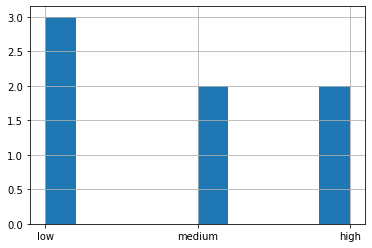

In [83]:
df1['price-level'].hist()

In [88]:
pd.get_dummies(df1['Colour'])

,Black,Red,White,black
0,0,0,1,0
1,0,1,0,0
3,1,0,0,0
4,0,0,1,0
6,0,0,0,1
8,0,0,1,0
9,0,0,1,0
